In [1]:
#Imports
import sys
sys.path.append('../../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)
#Express as weights
weighdata = 1/v_err1

In [3]:
#keeping others but holding them constant, no prefactors
def f(r,n,re,rc,h_rho00):
     return np.sqrt(nf.bh_v(r,load=True,path='../')**2 
                    + nf.h_v(r,rc,h_rho00,load=True,path='../')**2
                    + nf.b_v(r,n,re,load=True,path='../')**2
                    + nf.d_v(r,load=True,path='../')**2)
#keeping others but holding them constant, using prefactor
def g(r,c,rc,h_rho00):
     return np.sqrt(nf.bh_v(r,load=True,path='../')**2 
                    + nf.h_v(r,rc,h_rho00,load=True,path='../')**2
                    + c**2*nf.b_v(r,load=True,path='../')**2
                    + nf.d_v(r,load=True,path='../')**2)
#Only Bulge and Halo, no prefactors
def b_h(r,n,re,rc,h_rho00):
    return np.sqrt(nf.b_v(r,n,re,load=True,path='../')**2 + nf.h_v(r,rc,h_rho00,load=True,path='../')**2)
#Only Bulge and Halo, using prefactor
def b_h2(r,c,rc,h_rho00):
    return np.sqrt(c**2*nf.b_v(r,load=True,path='../')**2 + nf.h_v(r,rc,h_rho00,load=True,path='../')**2)

In [4]:
#Fit, Keeping rest constant, no prefactor

#Setup
l_mod = lm.Model(f)
l_params = l_mod.make_params()
#Bulge Params
l_params.add('n', value=nf.n_c, min=0)
l_params.add('re', value=nf.re_c, min=0)
#Halo Params
l_params.add('rc', value=nf.h_c, min=0)
l_params.add('h_rho00', value=nf.drho00_c, min=0)
#Do fit
l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

../../python/NGC5533_functions.py:231: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return si.quad(h, 0, r, args=(r,n,re))[0]
../../python/NGC5533_functions.py:231: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return si.quad(h, 0, r, args=(r,n,re))[0]


In [5]:
#Fit, Keeping rest constant, using prefactor

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Bulge Params
g_params.add('c', value=nf.n_c, min=0)
#Halo Params
g_params.add('rc', value=nf.h_c, min=0)
g_params.add('h_rho00', value=nf.drho00_c, min=0)
#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat,weights=weighdata)

In [6]:
#Fit, B and H only, no prefactor

#Setup
bh_mod = lm.Model(b_h)
bh_params = bh_mod.make_params()
#Bulge Params
bh_params.add('n', value=nf.n_c, min=0)
bh_params.add('re', value=nf.re_c, min=0)
#Halo Params
bh_params.add('rc', value=nf.h_c, min=0)
bh_params.add('h_rho00', value=nf.drho00_c, min=0)
#Do fit
bh_fit = bh_mod.fit(v_dat,bh_params,r=r_dat,weights=weighdata)

../../python/NGC5533_functions.py:225: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return si.quad(f, m, np.inf,args=(m,n,re))[0]


In [7]:
#Fit, B and H only, using prefactor

#Setup
bh2_mod = lm.Model(b_h2)
bh2_params = bh2_mod.make_params()
#Bulge Params
bh2_params.add('c', value=nf.n_c, min=0)
#Halo Params
bh2_params.add('rc', value=nf.h_c, min=0)
bh2_params.add('h_rho00', value=nf.drho00_c, min=0)
#Do fit
bh2_fit = bh2_mod.fit(v_dat,bh2_params,r=r_dat,weights=weighdata)

In [8]:
#Define curves to plot

l_dict = l_fit.best_values
l_n = l_dict['n']
l_re = l_dict['re']
l_rc = l_dict['rc']
l_h_rho00 = l_dict['h_rho00']

g_dict = g_fit.best_values
g_c = g_dict['c']
g_rc = g_dict['rc']
g_h_rho00 = g_dict['h_rho00']

bh_dict = bh_fit.best_values
bh_n = bh_dict['n']
bh_re = bh_dict['re']
bh_rc = bh_dict['rc']
bh_h_rho00 = bh_dict['h_rho00']

bh2_dict = bh2_fit.best_values
bh2_c = bh2_dict['c']
bh2_rc = bh2_dict['rc']
bh2_h_rho00 = bh2_dict['h_rho00']

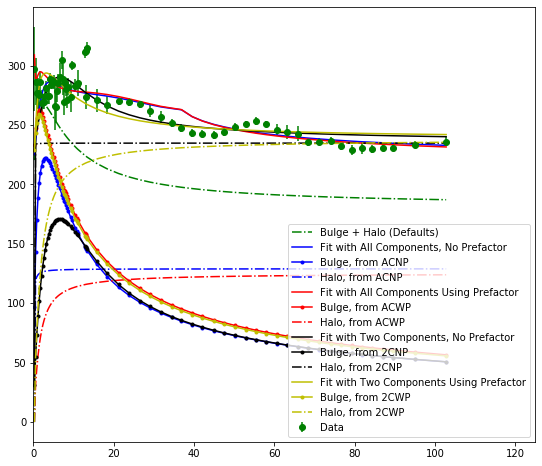

In [9]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)

#Not fit
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='go',label='Data')
plt.plot(r_dat,b_h(r_dat,nf.n_c,nf.re_c,nf.h_rc,nf.hrho00_c),'g-.',label='Bulge + Halo (Defaults)')

#All-Component Fit, no Prefactor
plt.plot(r_dat,f(r_dat,l_n,l_re,l_rc,l_h_rho00),'b-',label='Fit with All Components, No Prefactor')
plt.plot(r_dat,nf.b_v(r_dat,l_n,l_re,load=True,path='../'),'b.-',label='Bulge, from ACNP')
plt.plot(r_dat,nf.h_v(r_dat,l_rc,l_h_rho00,load=True,path='../'),'b-.',label='Halo, from ACNP')

#All-Component Fit, with Prefactor
plt.plot(r_dat,g(r_dat,g_c,g_rc,g_h_rho00),'r-',label='Fit with All Components Using Prefactor')
plt.plot(r_dat,g_c*nf.b_v(r_dat,load=True,path='../'),'r.-',label='Bulge, from ACWP')
plt.plot(r_dat,nf.h_v(r_dat,g_rc,g_h_rho00,load=True,path='../'),'r-.',label='Halo, from ACWP')

#Two-Component Fit, no Prefactor
plt.plot(r_dat,b_h(r_dat,bh_n,bh_re,bh_rc,bh_h_rho00),'k-',label='Fit with Two Components, No Prefactor')
plt.plot(r_dat,nf.b_v(r_dat,bh_n,bh_re,load=True,path='../'),'k.-',label='Bulge, from 2CNP')
plt.plot(r_dat,nf.h_v(r_dat,bh_rc,bh_h_rho00,load=True,path='../'),'k-.',label='Halo, from 2CNP')

#Two-Component Fit, with Prefactor
plt.plot(r_dat,b_h2(r_dat,bh2_c,bh2_rc,bh2_h_rho00),'y-',label='Fit with Two Components Using Prefactor')
plt.plot(r_dat,bh2_c*nf.b_v(r_dat,load=True,path='../'),'y.-',label='Bulge, from 2CWP')
plt.plot(r_dat,nf.h_v(r_dat,bh2_rc,bh2_h_rho00,load=True,path='../'),'y-.',label='Halo, from 2CWP')

plt.legend()
plt.show()

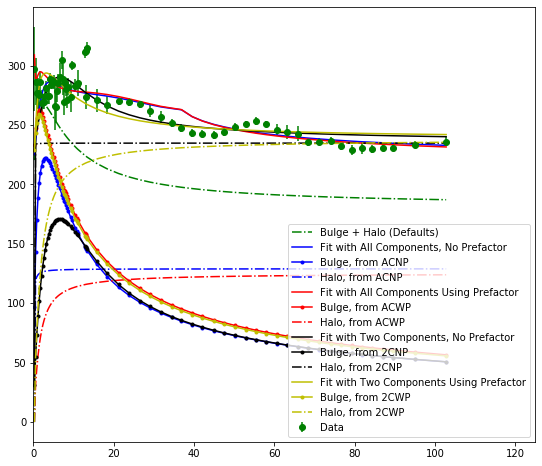

In [10]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)

#Not fit
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='go',label='Data')
plt.plot(r_dat,b_h(r_dat,nf.n_c,nf.re_c,nf.h_rc,nf.hrho00_c),'g-.',label='Bulge + Halo (Defaults)')

#All-Component Fit, no Prefactor
plt.plot(r_dat,f(r_dat,l_n,l_re,l_rc,l_h_rho00),'b-',label='Fit with All Components, No Prefactor')
plt.plot(r_dat,nf.b_v(r_dat,l_n,l_re,load=True,path='../'),'b.-',label='Bulge, from ACNP')
plt.plot(r_dat,nf.h_v(r_dat,l_rc,l_h_rho00,load=True,path='../'),'b-.',label='Halo, from ACNP')

#All-Component Fit, with Prefactor
plt.plot(r_dat,g(r_dat,g_c,g_rc,g_h_rho00),'r-',label='Fit with All Components Using Prefactor')
plt.plot(r_dat,g_c*nf.b_v(r_dat,load=True,path='../'),'r.-',label='Bulge, from ACWP')
plt.plot(r_dat,nf.h_v(r_dat,g_rc,g_h_rho00,load=True,path='../'),'r-.',label='Halo, from ACWP')

#Two-Component Fit, no Prefactor
plt.plot(r_dat,b_h(r_dat,bh_n,bh_re,bh_rc,bh_h_rho00),'k-',label='Fit with Two Components, No Prefactor')
plt.plot(r_dat,nf.b_v(r_dat,bh_n,bh_re,load=True,path='../'),'k.-',label='Bulge, from 2CNP')
plt.plot(r_dat,nf.h_v(r_dat,bh_rc,bh_h_rho00,load=True,path='../'),'k-.',label='Halo, from 2CNP')

#Two-Component Fit, with Prefactor
plt.plot(r_dat,b_h2(r_dat,bh2_c,bh2_rc,bh2_h_rho00),'y-',label='Fit with Two Components Using Prefactor')
plt.plot(r_dat,bh2_c*nf.b_v(r_dat,load=True,path='../'),'y.-',label='Bulge, from 2CWP')
plt.plot(r_dat,nf.h_v(r_dat,bh2_rc,bh2_h_rho00,load=True,path='../'),'y-.',label='Halo, from 2CWP')

plt.legend()
plt.show()

In [11]:
print('Fit information for all-component fit (Without Prefactor):')
l_fit

Fit information for all-component fit (Without Prefactor):


In [12]:
print('Fit information for all-component fit (With Prefactor):')
g_fit

Fit information for all-component fit (With Prefactor):


In [13]:
print('Fit information for two-component fit (Without Prefactor):')
bh_fit

Fit information for two-component fit (Without Prefactor):


In [14]:
print('Fit information for two-component fit (With Prefactor):')
bh2_fit

Fit information for two-component fit (With Prefactor):


In [15]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())

Total Time:
113831.41292786598 seconds

Timestamp:
2020-03-14 20:10:59.219927
